In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [3]:
!pip install mapclassify
import mapclassify #need for thematic map classification

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.2 MB/s eta 0:00:00


In [4]:
! wget -q -O world-administrative-boundaries.zip https://docs.google.com/uc?id=1Nhciw6gPCoA6L98N4Kw0fKNT-Caf4e8_&export=download

zip_ref = zipfile.ZipFile('world-administrative-boundaries.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('world-administrative-boundaries.shp') #load the shapefile with gpd as njC

<Axes: >

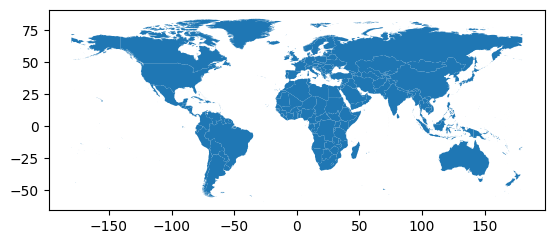

In [5]:
njC0.plot()

In [6]:
njC0.dtypes

iso3             object
status           object
color_code       object
name             object
continent        object
region           object
iso_3166_1_      object
french_shor      object
geometry       geometry
dtype: object

In [7]:
njC0.head(10)

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
0,MNP,US Territory,USA,Northern Mariana Islands,Oceania,Micronesia,MP,Northern Mariana Islands,"MULTIPOLYGON (((145.63331 14.91236, 145.62412 ..."
1,NaN,Sovereignty unsettled,RUS,Kuril Islands,Asia,Eastern Asia,NaN,Kuril Islands,"MULTIPOLYGON (((146.68274 43.70777, 146.66664 ..."
2,FRA,Member State,FRA,France,Europe,Western Europe,FR,France,"MULTIPOLYGON (((9.44750 42.68305, 9.45014 42.6..."
3,SRB,Member State,SRB,Serbia,Europe,Southern Europe,RS,Serbie,"POLYGON ((20.26102 46.11485, 20.31403 46.06986..."
4,URY,Member State,URY,Uruguay,Americas,South America,UY,Uruguay,"POLYGON ((-53.37430 -33.74067, -53.39917 -33.7..."
5,GUM,US Non-Self-Governing Territory,GUM,Guam,Oceania,Micronesia,GU,Guam,"POLYGON ((144.70941 13.23500, 144.70245 13.235..."
6,PAN,Member State,PAN,Panama,Americas,Central America,PA,Panama,"MULTIPOLYGON (((-81.67847 7.38861, -81.64944 7..."
7,ANT,NL Territory,NLD,Netherlands Antilles,Americas,Caribbean,NaN,Netherlands Antilles,"MULTIPOLYGON (((-68.19736 12.22264, -68.19292 ..."
8,DZA,Member State,DZA,Algeria,Africa,Northern Africa,DZ,AlgÃ©rie,"POLYGON ((8.62203 36.94137, 8.63222 36.88194, ..."
9,TGO,Member State,TGO,Togo,Africa,Western Africa,TG,Togo,"POLYGON ((0.91797 10.99640, 0.89056 10.91111, ..."


In [8]:
# computing number of rows
rows_world = len(njC0.axes[0])

# computing number of columns
cols_world = len(njC0.axes[1])

print("Number of Rows: ", rows_world)
print("Number of Columns: ", cols_world)

Number of Rows:  256
Number of Columns:  9


In [9]:
njC0.columns

Index(['iso3', 'status', 'color_code', 'name', 'continent', 'region',
       'iso_3166_1_', 'french_shor', 'geometry'],
      dtype='object')

In [10]:
pd.__version__

'1.5.3'

In [11]:
! wget -q -O Fortune-500.csv  https://raw.githubusercontent.com/KazaGeetanjali/GIScode/KazaGeetanjali-GISAssignments/Fortune-500.csv

dataset = pd.read_csv("Fortune-500.csv", encoding='latin1')
dataset.head()
#! cat Fortune-500.csv

,Rank,Company Name,Country,Number of Employees,Previous Rank,Revenues ($millions),Revenue Change,Profits ($millions),Profit Change,Assets ($millions)
0,1,Walmart,U.S.,2100000,1,611289,0.067,11680,-0.146,243197
1,2,Saudi Aramco,Saudi Arabia,70496,6,603651,0.508,159069,0.51,663541
2,3,State Grid,China,870287,3,530009,0.151,8192,0.148,710763
3,4,Amazon,U.S.,1541000,2,513983,0.094,-2722,-1.082,462675
4,5,China National Petroleum,China,1087049,4,483019,0.173,21080,1.187,637223


In [12]:
dataset.dtypes

Rank                     int64
Company Name            object
Country                 object
Number of Employees      int64
Previous Rank           object
Revenues ($millions)     int64
Revenue Change          object
Profits ($millions)      int64
Profit Change           object
Assets ($millions)       int64
dtype: object

In [13]:
dataset.columns

Index(['Rank', 'Company Name', 'Country', 'Number of Employees',
       'Previous Rank', 'Revenues ($millions)', 'Revenue Change',
       'Profits ($millions)', 'Profit Change', 'Assets ($millions)'],
      dtype='object')

In [14]:
dataset.head(10)

,Rank,Company Name,Country,Number of Employees,Previous Rank,Revenues ($millions),Revenue Change,Profits ($millions),Profit Change,Assets ($millions)
0,1,Walmart,U.S.,2100000,1,611289,0.067,11680,-0.146,243197
1,2,Saudi Aramco,Saudi Arabia,70496,6,603651,0.508,159069,0.51,663541
2,3,State Grid,China,870287,3,530009,0.151,8192,0.148,710763
3,4,Amazon,U.S.,1541000,2,513983,0.094,-2722,-1.082,462675
4,5,China National Petroleum,China,1087049,4,483019,0.173,21080,1.187,637223
5,6,Sinopec Group,China,527487,5,471154,0.174,9657,0.161,368751
6,7,Exxon Mobil,U.S.,62000,12,413680,0.448,55740,1.419,369067
7,8,Apple,U.S.,164000,7,394328,0.078,99803,0.054,352755
8,9,Shell,Britain,93000,15,386201,0.416,42309,1.105,443024
9,10,UnitedHealth Group,U.S.,400000,11,324162,0.127,20120,0.164,245705


In [15]:
# computing number of rows
rows = len(dataset.axes[0])

# computing number of columns
cols = len(dataset.axes[1])

print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  500
Number of Columns:  10


In [16]:
print(dataset.Country.to_string(index=False))

        U.S.
Saudi Arabia
       China
        U.S.
       China
       China
        U.S.
        U.S.
     Britain
        U.S.
        U.S.
   Singapore
       China
        U.S.
     Germany
     Germany
        U.S.
        U.S.
       Japan
      France
 Switzerland
     Britain
        U.S.
        U.S.
 South Korea
        U.S.
      Taiwan
       China
       China
        U.S.
 Netherlands
       China
       China
        U.S.
        U.S.
        U.S.
        U.S.
       China
       China
        U.S.
      Russia
       China
       China
       China
       Japan
        U.S.
     Germany
        U.S.
       China
        U.S.
        U.S.
       China
        U.S.
       China
      France
      Norway
     Germany
        U.S.
       Italy
        U.S.
       Italy
       China
       China
        U.S.
       China
        U.S.
     Germany
       China
       China
       Japan
      Brazil
       China
     Germany
       China
        U.S.
       China
        U.S.

In [17]:
print(njC0.name.to_string(index=False))
#.to_string(index=False))

                  Northern Mariana Islands
                             Kuril Islands
                                    France
                                    Serbia
                                   Uruguay
                                      Guam
                                    Panama
                      Netherlands Antilles
                                   Algeria
                                      Togo
                           Ma'tan al-Sarra
                               Switzerland
                                    Jersey
                                   Austria
                                  Portugal
                                Luxembourg
                                Kazakhstan
                                     Aruba
                                  Holy See
                         Equatorial Guinea
                                   Jamaica
                                   Estonia
                                     Niger
           

In [18]:
dataset['Country'] = dataset['Country'].str.upper().str.replace(' ', '').str.replace('.', '')
print(dataset.Country.to_string(index=False))

         US
SAUDIARABIA
      CHINA
         US
      CHINA
      CHINA
         US
         US
    BRITAIN
         US
         US
  SINGAPORE
      CHINA
         US
    GERMANY
    GERMANY
         US
         US
      JAPAN
     FRANCE
SWITZERLAND
    BRITAIN
         US
         US
 SOUTHKOREA
         US
     TAIWAN
      CHINA
      CHINA
         US
NETHERLANDS
      CHINA
      CHINA
         US
         US
         US
         US
      CHINA
      CHINA
         US
     RUSSIA
      CHINA
      CHINA
      CHINA
      JAPAN
         US
    GERMANY
         US
      CHINA
         US
         US
      CHINA
         US
      CHINA
     FRANCE
     NORWAY
    GERMANY
         US
      ITALY
         US
      ITALY
      CHINA
      CHINA
         US
      CHINA
         US
    GERMANY
      CHINA
      CHINA
      JAPAN
     BRAZIL
      CHINA
    GERMANY
      CHINA
         US
      CHINA
         US
         US
    GERMANY
     MEXICO
         US
         US
      CHINA
    

<ipython-input-18-c9f1367a4bd5>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset['Country'] = dataset['Country'].str.upper().str.replace(' ', '').str.replace('.', '')


In [19]:
njC0['name'] = njC0['name'].str.upper().str.replace(' ', '').str.replace('.', '')
print(njC0.name.to_string(index=False))

               NORTHERNMARIANAISLANDS
                         KURILISLANDS
                               FRANCE
                               SERBIA
                              URUGUAY
                                 GUAM
                               PANAMA
                  NETHERLANDSANTILLES
                              ALGERIA
                                 TOGO
                       MA'TANAL-SARRA
                          SWITZERLAND
                               JERSEY
                              AUSTRIA
                             PORTUGAL
                           LUXEMBOURG
                           KAZAKHSTAN
                                ARUBA
                              HOLYSEE
                     EQUATORIALGUINEA
                              JAMAICA
                              ESTONIA
                                NIGER
                               BELIZE
                              MOROCCO
                                MALTA
            

<ipython-input-19-5461f64a5cc6>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  njC0['name'] = njC0['name'].str.upper().str.replace(' ', '').str.replace('.', '')


In [20]:
njC0 = njC0.rename(columns = {'name':'Country'})
njC0.columns

Index(['iso3', 'status', 'color_code', 'Country', 'continent', 'region',
       'iso_3166_1_', 'french_shor', 'geometry'],
      dtype='object')

In [21]:
dataset['Country'] = dataset['Country'].replace('US','UNITEDSTATESOFAMERICA')
print(dataset.Country.to_string(index=False))

UNITEDSTATESOFAMERICA
          SAUDIARABIA
                CHINA
UNITEDSTATESOFAMERICA
                CHINA
                CHINA
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
              BRITAIN
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
            SINGAPORE
                CHINA
UNITEDSTATESOFAMERICA
              GERMANY
              GERMANY
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
                JAPAN
               FRANCE
          SWITZERLAND
              BRITAIN
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
           SOUTHKOREA
UNITEDSTATESOFAMERICA
               TAIWAN
                CHINA
                CHINA
UNITEDSTATESOFAMERICA
          NETHERLANDS
                CHINA
                CHINA
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
                CHINA
                CHINA
UNITEDSTATESOFAMERICA
               RUSSIA
                CHINA
                CHINA
                CHINA
                JAPAN
UNITEDSTAT

In [22]:
Fortune_inner_join = pd.merge(njC0, dataset, on = 'Country', how = 'inner', indicator = False)

Fortune_outer_join = pd.merge(njC0, dataset, on = 'Country', how = 'outer', indicator = False)

In [23]:
Fortune_inner_join.to_csv("Fortune_inner_join.csv")
Fortune_outer_join.to_csv("Fortune_outer_join.csv")

In [24]:
Fortune_inner_join

In [ ]:
#your first thematic map! :) lets unpack options real quick esp fmt for dec pts; more later under 'bells and whistles'
fig, ax = plt.subplots(1, figsize=(15,15))
njC0.plot(ax=ax,column='POPDEN2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("Population Density 2010 (pers/sq mi)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as